# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural netwroks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of clssification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


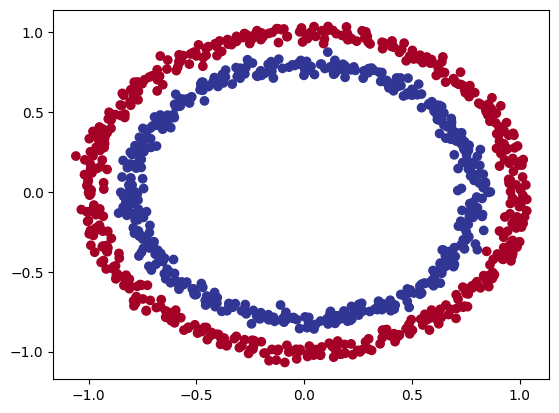

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modeling with TensorFlow are typically:
1. Craeate or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.12.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.6354 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4840


In [11]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693248987197876, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.5060


[0.700063943862915, 0.5059999823570251]

To visualize our model's predictions, let's create a fucntion `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function is inspired by two resources:

  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrayes together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


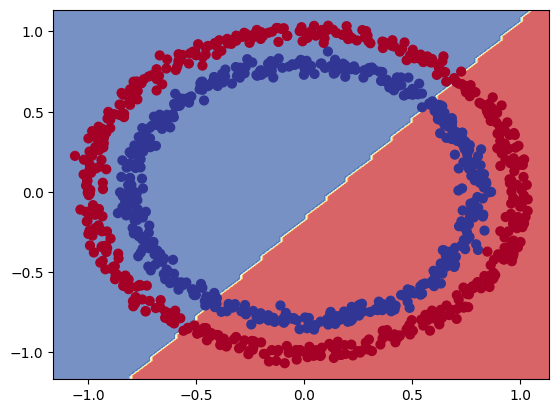

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [19]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 569.8323 - mae: 569.8323
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 467.6056 - mae: 467.6056
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 370.3507 - mae: 370.3507
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 270.0439 - mae: 270.0439
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 165.5653 - mae: 165.5653
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 60.4855 - mae: 60.4855
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 75.6292 - mae: 75.6292
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 85.7108 - mae: 85.7108
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 61.1657 - mae: 61.1657
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 46.8835 - mae: 46.8835
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


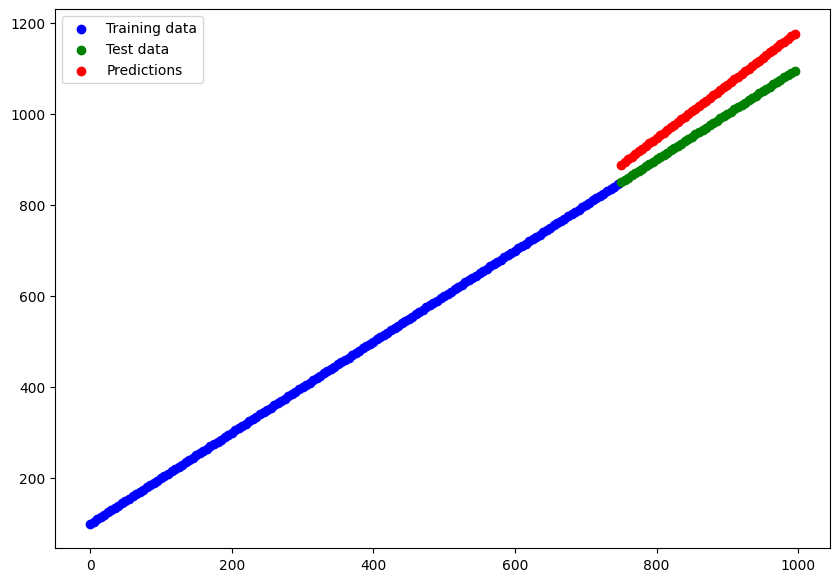

In [20]:
# make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9019 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8670 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8369 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8347 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8340 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8331 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8322 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8314 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8213 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8191 - accuracy: 0.4780
Epoch 11/

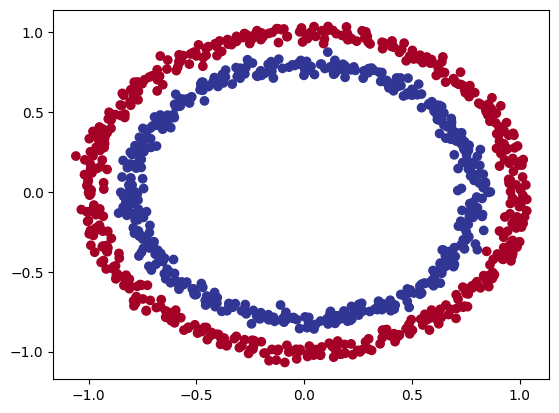

In [22]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing binary classification


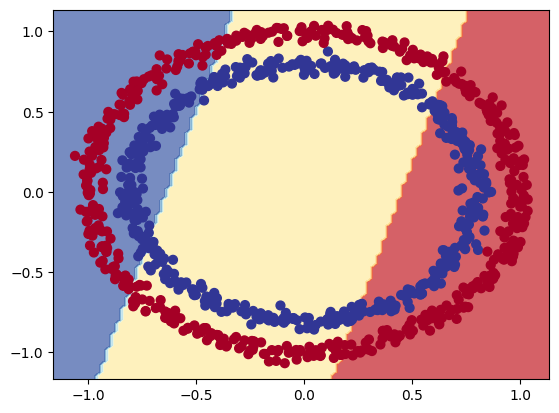

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with a non-linear activation function

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3308 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2158 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1728 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1626 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0948 - accuracy: 0.4560
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0093 - accuracy: 0.4360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9708 - accuracy: 0.4320
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9330 - accuracy: 0.4260
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8717 - accuracy: 0.4230
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8267 - accuracy: 0.4200
Epoch 11/

In [25]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9352 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.3300
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.3600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7931 - accuracy: 0.3800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.4000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7625 - accuracy: 0.3870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.4290
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.4240
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.4000
Epoch 11/

In [26]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7940


[0.4917808175086975, 0.7940000295639038]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


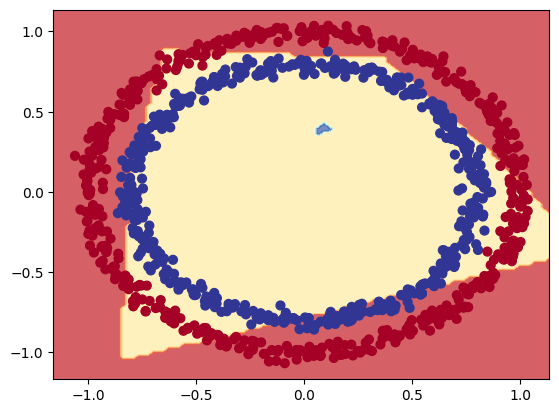

In [27]:
# How do our model predctions look?
plot_decision_boundary(model_6, X, y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5140
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5210
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5270
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5340
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5400
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5440
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5510
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5480
Epoch 11/

In [29]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8510


[0.4226922392845154, 0.8510000109672546]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


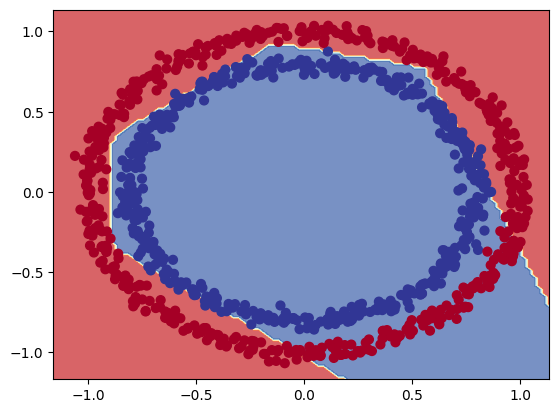

In [30]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [31]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

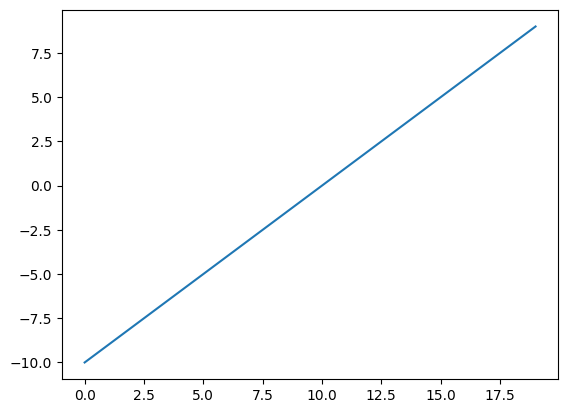

In [32]:
# Visualize our toy tensor
plt.plot(A);

In [33]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid fuction on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

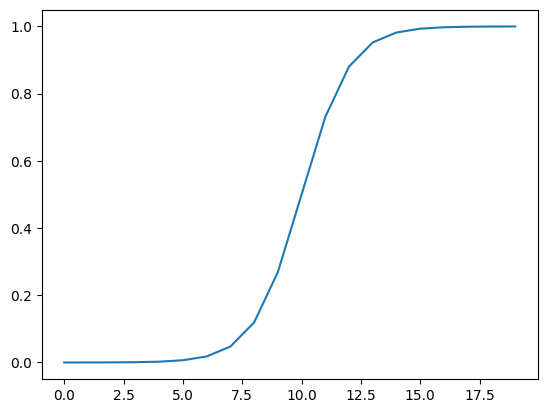

In [34]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [35]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu fuction
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [36]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

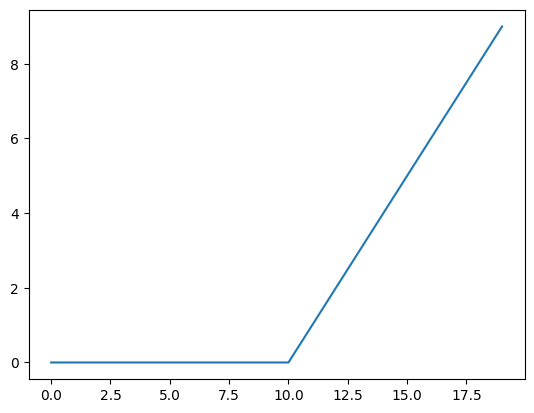

In [37]:
plt.plot(relu(A));

In [38]:
# Let;s try the linear activation fuction
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

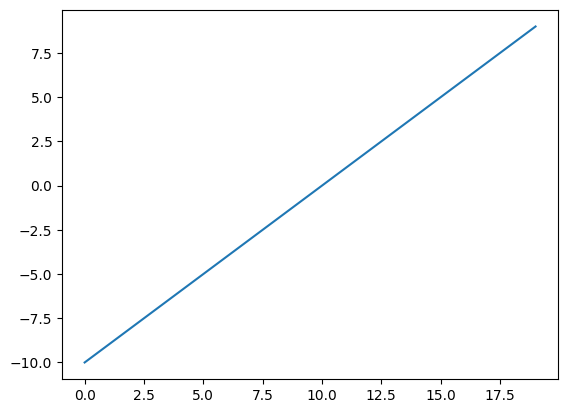

In [39]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [40]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

::## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [41]:
# Check how many examples we have
len(X)

1000

In [42]:
# Split into train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5150
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5362
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5587
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5788
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.5838
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.5738
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.5987
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6012
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6225
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6212
Epoch 11/25
25/25 [

In [44]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9000


[0.20608370006084442, 0.8999999761581421]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


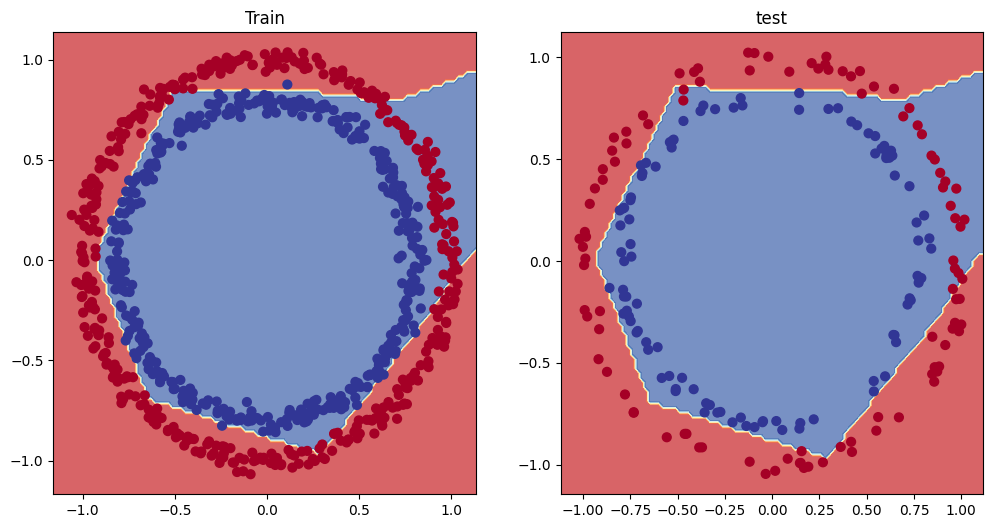

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

## Plot the loss (or training) curves

In [46]:
# Convert the hisroty object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.690499,0.51500
1,0.679173,0.53625
2,0.672270,0.55875
3,0.666177,0.57875
4,0.661696,0.58375
5,0.654362,0.57375
6,0.648979,0.59875
7,0.644195,0.60125
8,0.635073,0.62250
9,0.624484,0.62125


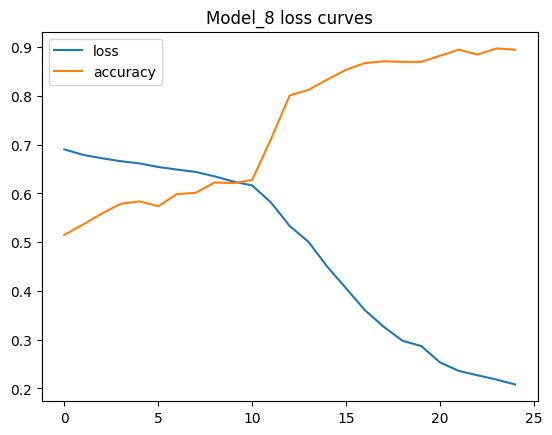

In [47]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same on as above, but we're practicing building models here).
* A modified loss curves plot.

In [48]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5175 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

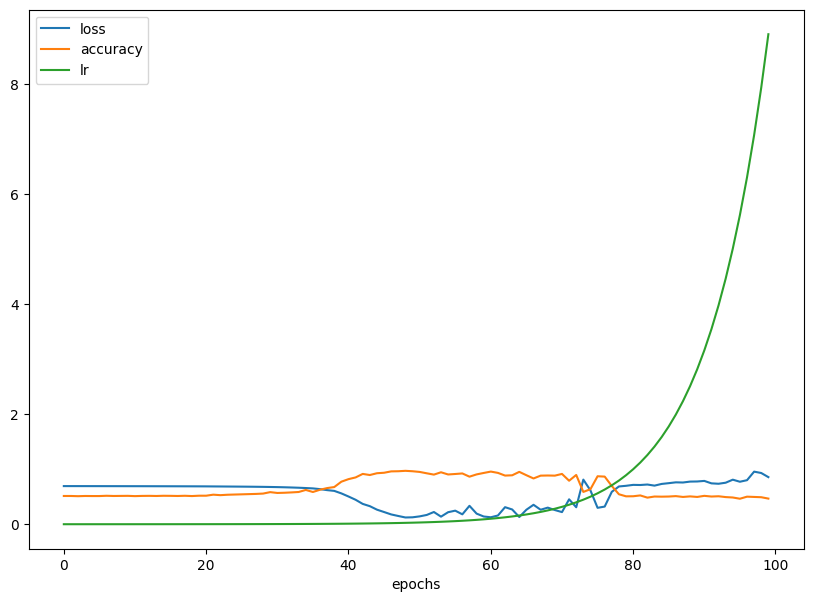

In [49]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

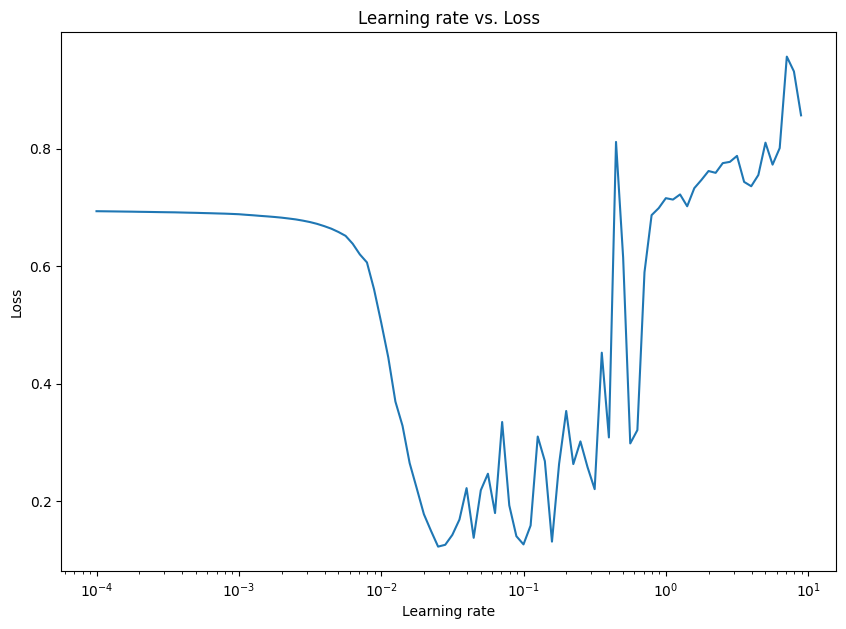

In [50]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [51]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [52]:
# Let's try using a higher *ideal* learning rate with same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5138
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5387
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5863
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6513
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7375
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.8600
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.9013
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.9275
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9725
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9862
Epoch 11/20
25/25 [

In [53]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9900


[0.04974164068698883, 0.9900000095367432]

In [54]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9000


[0.20608370006084442, 0.8999999761581421]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


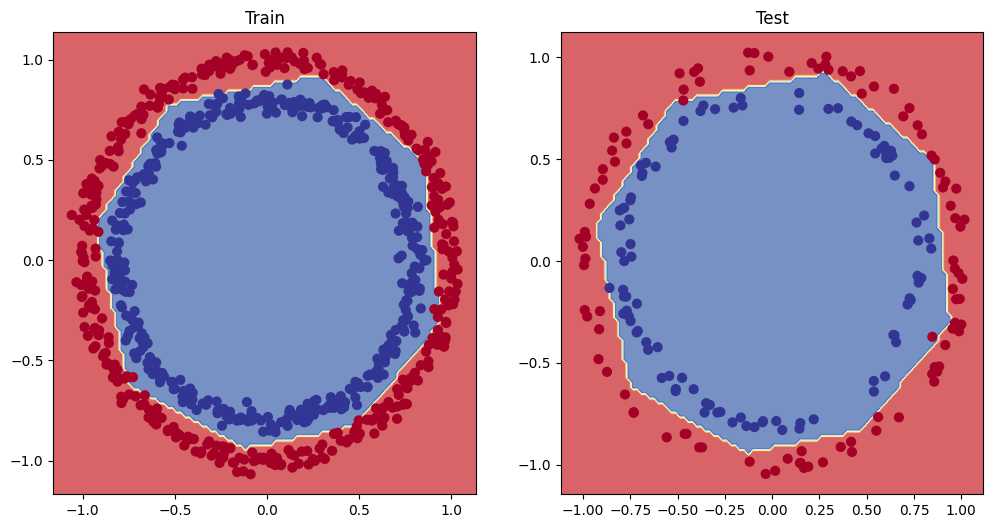

In [55]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [56]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test , y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9900
Model loss on the test set: 0.04974164068698883
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [57]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


In [58]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [59]:
y_preds[:10]

array([[0.99895155],
       [0.99974954],
       [0.9980936 ],
       [0.9955295 ],
       [0.10442241],
       [0.06187837],
       [0.9429839 ],
       [0.00424679],
       [0.9951094 ],
       [0.20829375]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [60]:
# Convert predction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [61]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

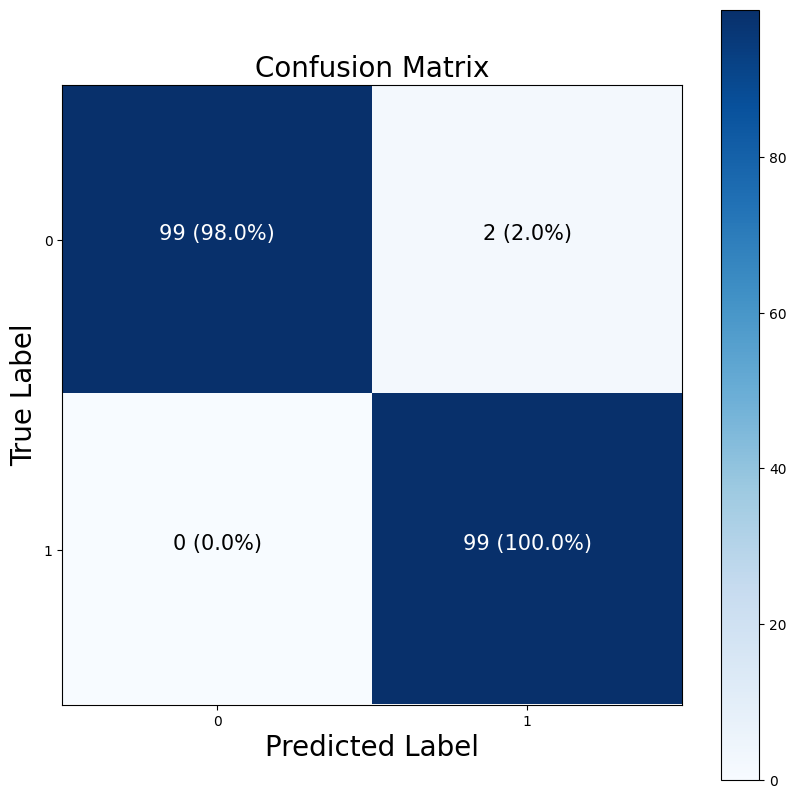

In [62]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different color
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you haave 3 different classes, it's multi-class classification.
* It alse means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [63]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [64]:
# Show the first training example
print(f"Training example:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [65]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

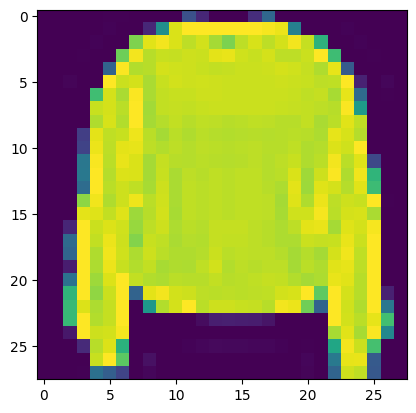

In [66]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [67]:
# Check out samples label
train_labels[7]

2

In [68]:
# Create a small list so we can index into our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

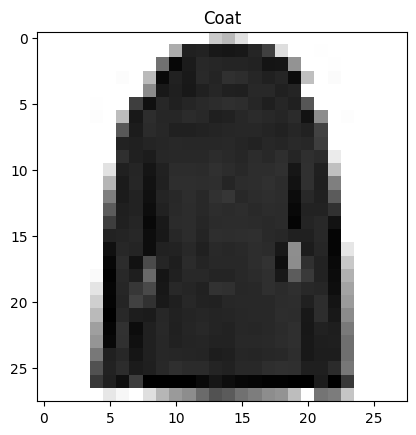

In [69]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

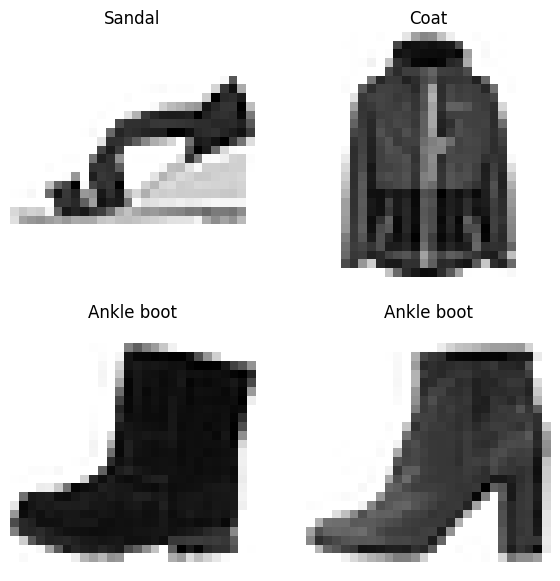

In [70]:
# Plot multiple images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss fuction = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not Sigmoid)

In [71]:
train_data[0].shape

(28, 28)

In [72]:
len(class_names)

10

In [73]:
# Our data needs to be flattened (from 28*28 to None, 187)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3560 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [75]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be sacaled (or normalized), this means they like to have the numbers in the tensors they try to find the pattern between 0 & 1.

In [77]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [78]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0358 - accuracy: 0.5812 - val_loss: 0.8102 - val_accuracy: 0.6956
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7422 - accuracy: 0.7300 - val_loss: 0.7291 - val_accuracy: 0.7474
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6764 - accuracy: 0.7573 - val_loss: 0.6868 - val_accuracy: 0.7547
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6433 - accuracy: 0.7685 - val_loss: 0.6702 - val_accuracy: 0.7591
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6252 - accuracy: 0.7727 - val_loss: 0.6550 - val_accuracy: 0.7631
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6094 - accuracy: 0.7792 - val_loss: 0.6630 - val_accuracy: 0.7655
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5967 - accuracy: 0.7828 - val_loss: 0.6312 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

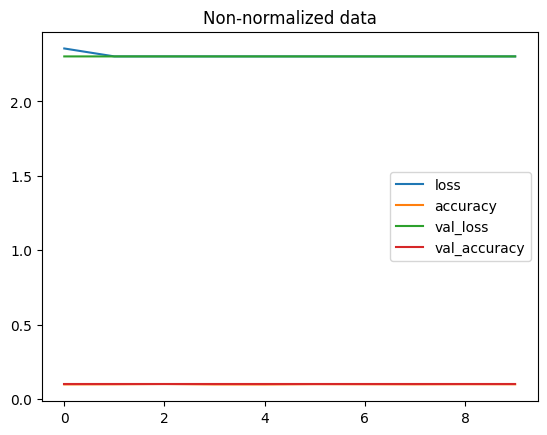

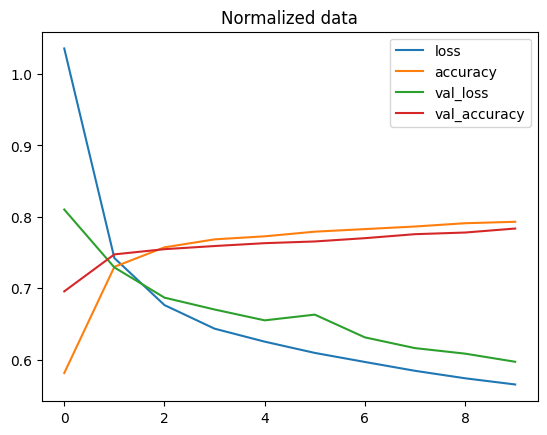

In [79]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architechture).

## Finding the ideal learning rate

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2061 - accuracy: 0.5185 - val_loss: 0.9158 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8040 - accuracy: 0.6990 - val_loss: 0.7133 - val_accuracy: 0.7176 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6501 - accuracy: 0.7398 - val_loss: 0.6450 - val_accuracy: 0.7477 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6173 - accuracy: 0.7537 - val_loss: 0.6285 - val_accuracy: 0.7503 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5846 - accuracy: 0.7842 - val_loss: 0.5916 - val_accuracy: 0.7908 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8066 - val_loss: 0.5783 - val_accuracy: 0.8039 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

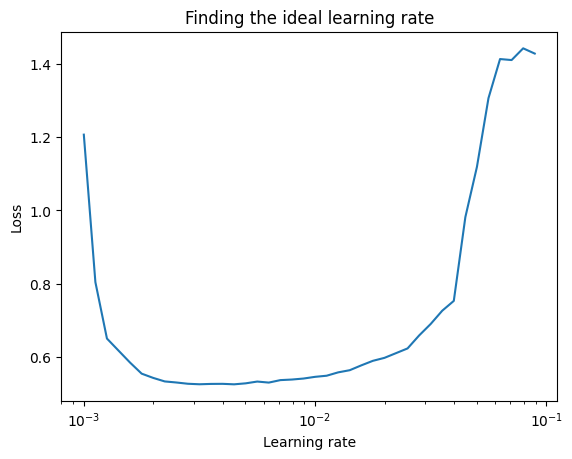

In [81]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [82]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5263 - accuracy: 0.4532 - val_loss: 1.1525 - val_accuracy: 0.5750
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0129 - accuracy: 0.6035 - val_loss: 0.9549 - val_accuracy: 0.6179
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8777 - accuracy: 0.6727 - val_loss: 0.8441 - val_accuracy: 0.6973
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7872 - accuracy: 0.7061 - val_loss: 0.7792 - val_accuracy: 0.6966
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7397 - accuracy: 0.7109 - val_loss: 0.7501 - val_accuracy: 0.7066
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7155 - accuracy: 0.7172 - val_loss: 0.7355 - val_accuracy: 0.7144
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6996 - accuracy: 0.7298 - val_loss: 0.7198 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate out multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as a confusion matrix)
* Assess some if its predictions (though visualizations)
* Improve its results (by training it fr longer or changing the architechture)
* Save and export it for use in an application

Let's go through the top 2...

In [83]:
# Create our confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [84]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [85]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.5860847e-17, 8.0046902e-10, 2.0463654e-14, 3.7471302e-18,
        8.9338750e-15, 2.9758400e-01, 1.4631682e-15, 1.5899681e-01,
        2.9628922e-09, 5.4341912e-01],
       [5.6214940e-02, 1.7360030e-03, 4.8704872e-01, 2.6867876e-03,
        1.3019955e-01, 4.4369403e-06, 3.2054952e-01, 1.4353906e-03,
        1.2464344e-04, 6.4957035e-08],
       [1.4205910e-04, 9.9365807e-01, 1.8979174e-08, 5.7060136e-03,
        7.9982918e-08, 1.7510215e-06, 1.4370480e-05, 4.7762881e-04,
        7.6918730e-14, 8.7865076e-10],
       [4.6592999e-05, 9.9734831e-01, 1.2954953e-09, 2.3766917e-03,
        4.1694537e-09, 1.5132058e-07, 2.4733547e-06, 2.2573025e-04,
        3.4968707e-16, 9.2385134e-11],
       [2.2735205e-01, 3.9425734e-03, 2.0490626e-01, 1.5963363e-02,
        4.6756931e-02, 7.0927406e-08, 5.0089556e-01, 1.8248556e-04,
        5.9046539e-07, 6.5568229e-10]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [86]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.5860847e-17, 8.0046902e-10, 2.0463654e-14, 3.7471302e-18,
        8.9338750e-15, 2.9758400e-01, 1.4631682e-15, 1.5899681e-01,
        2.9628922e-09, 5.4341912e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [87]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [87]:
test_labels

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[690,   3,  55, 127,  38,   2,  74,   0,  11,   0],
       [  1, 934,   8,  44,   9,   1,   2,   0,   1,   0],
       [ 15,   1, 663,  12, 257,   0,  36,   0,  16,   0],
       [ 26,  24,  16, 817,  82,   2,  28,   0,   5,   0],
       [  0,   0, 198,  29, 717,   0,  10,   0,  46,   0],
       [  0,   0,   0,   0,   3, 870,   0,  55,  15,  57],
       [139,   1, 389,  84, 263,   1,  97,   0,  26,   0],
       [  0,   0,   0,   0,   0,  42,   0, 911,   1,  46],
       [  0,   1,  10,   5,  44,  13,   2,   4, 921,   0],
       [  0,   0,   0,   0,   0,  43,   0,  41,   1, 915]])

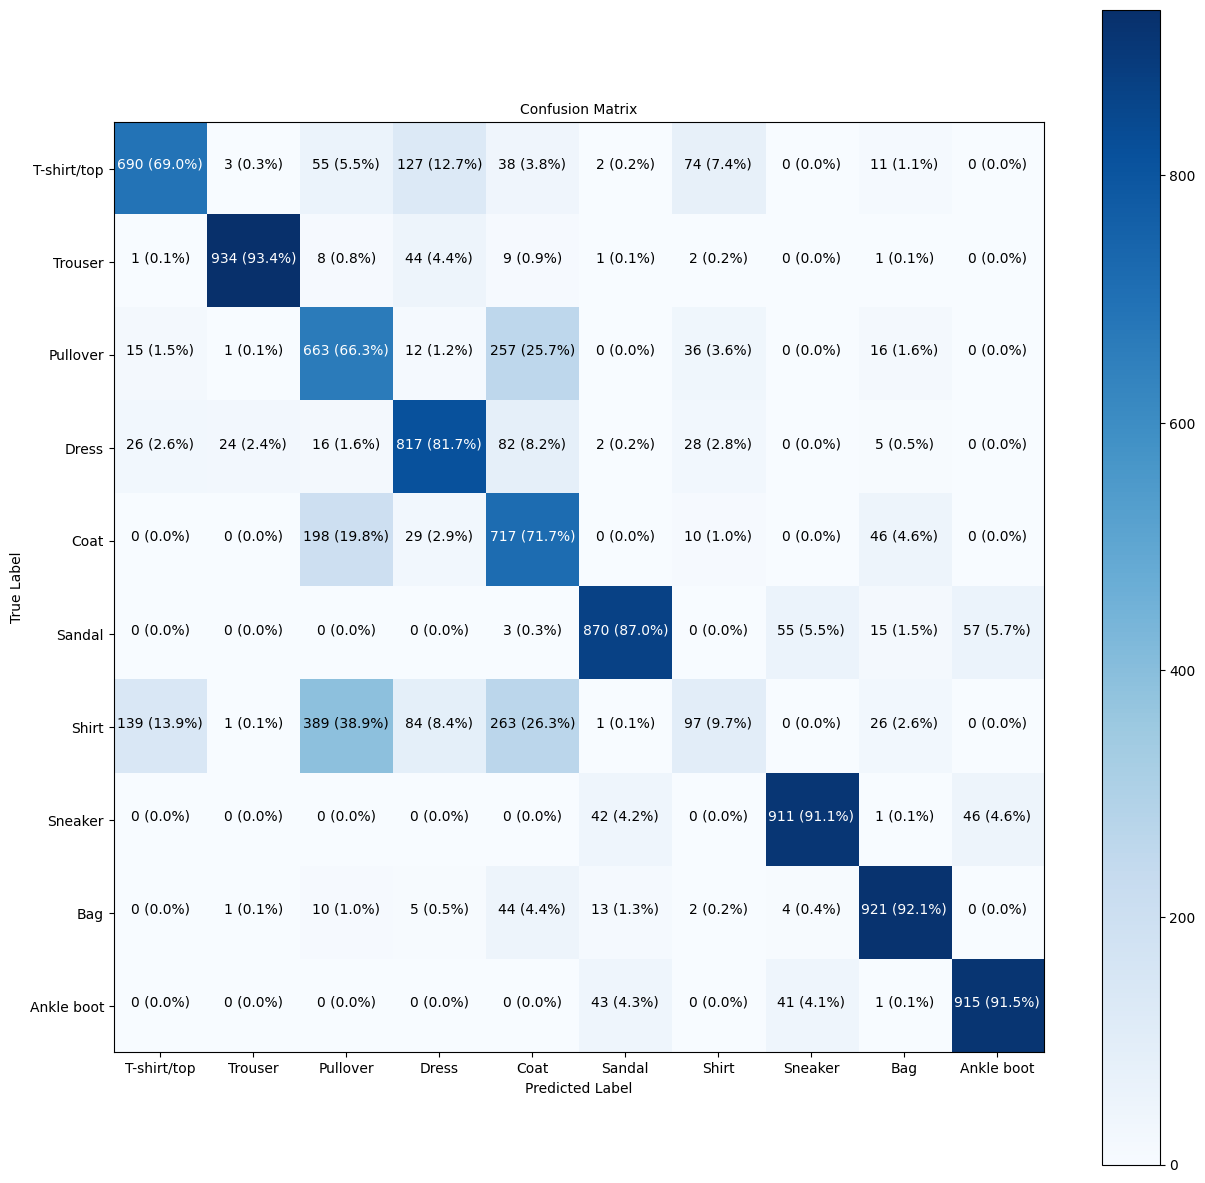

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, ut's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [99]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediciton is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
            color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 25ms/step


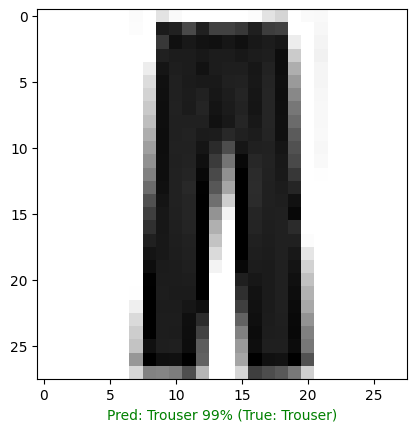

In [101]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model as trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [102]:
# Find the layer our most recent model
model_14.layers

In [103]:
# Extract a particular layer
model_14.layers[1]

In [104]:
# Get the pattern of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5734788 , -0.06167163, -0.5236246 ,  0.22967531],
        [ 1.5978258 ,  0.03750739, -0.30297318, -0.27670223],
        [ 1.1035216 , -0.0556666 , -0.8271301 ,  0.85546684],
        ...,
        [ 0.11131337, -0.08575277, -0.8673415 , -0.43699905],
        [ 0.35610774,  0.04774101, -0.37340266, -0.72573096],
        [ 0.8491727 ,  0.08317849, -0.14087784, -0.2861219 ]],
       dtype=float32),
 (784, 4))

In [105]:
28 * 28

784

In [107]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [108]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.39510494, -0.01954358,  0.9742999 ,  0.48201555], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [109]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


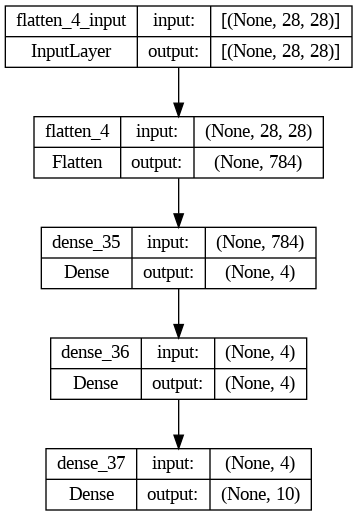

In [111]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...